In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.graph_objects as go
from scipy.stats import chi2_contingency
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_validate, cross_val_predict, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report, f1_score, roc_auc_score, ConfusionMatrixDisplay,precision_score, recall_score, auc
from sklearn.model_selection import cross_validate, cross_val_predict, train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder, PowerTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.decomposition import PCA
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
from sklearn.compose import ColumnTransformer

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/heart.csv')

# Data Overview

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
df.info() # To get a general overview of the features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


From the description above,  the dataset is made up entirely of integer values

Statistical Summary of the Data

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Check for Empty Cells

In [ ]:
n_empty_cells = df.isnull().sum()
print(n_empty_cells)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [ ]:
n_isna_cells = df.isna().sum()
print(n_isna_cells)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


From the above, we do not have empty cells

Check for duplicates

In [ ]:
duplicates = df[df.duplicated()] # Get a list of duplicates
df = df[~df.duplicated()]
print(f"Number of duplicate rows deleted: {len(duplicates)}")
print(f'Shape of the dataframe is now: {df.shape}')

Number of duplicate rows deleted: 723
Shape of the dataframe is now: (302, 14)


Class Distribution. We check the distribution  of the target variable to verify the balance of our dataset

In [ ]:
counts = df['target'].value_counts()

print(counts)

target
1    164
0    138
Name: count, dtype: int64


After removal of duplicates, our dataset has become even smaller. So, we can print out the unique values for each feature and examine them properly

Data Overview

In [ ]:
for col in df.columns:
    print(f"'{col}' column has {len(df[col].unique())} unique values")
    print("---------------------------------------------------------")

'age' column has 41 unique values
---------------------------------------------------------
'sex' column has 2 unique values
---------------------------------------------------------
'cp' column has 4 unique values
---------------------------------------------------------
'trestbps' column has 49 unique values
---------------------------------------------------------
'chol' column has 152 unique values
---------------------------------------------------------
'fbs' column has 2 unique values
---------------------------------------------------------
'restecg' column has 3 unique values
---------------------------------------------------------
'thalach' column has 91 unique values
---------------------------------------------------------
'exang' column has 2 unique values
---------------------------------------------------------
'oldpeak' column has 40 unique values
---------------------------------------------------------
'slope' column has 3 unique values
------------------------------

From the unique values, and the description on the data page, we can infer that the sex, cp, fbs, restecg, exang, slope, ca, and thal columns are categorical, while the age, trestbps, chol, thalach, and oldpeak columns are numeric

In [ ]:
numeric = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categorical = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

From the information about the dataset on the source website, and the description above, we see that the target column shows the presence(1) or absence(0) of cardiovascular diseases in the examined persons.

# Exploratory Data Analysis (EDA)

In [ ]:
import plotly.express as px
hrt_pos = df['target'].value_counts()
# Create the labels for positive and negative cases
labels = ['Heart Disease','No Heart Disease']
# Create the donut plot
figure = px.pie(df,
                values=hrt_pos.values,
                names=labels,
                hole=0.5,
                title="Heart Disease")
figure.show()

From the pie chart above, we can see the target feature is pretty evenly distributed

## Numerical Features Compared Against the Target

# Bivariate Analysis

In [ ]:
sb.pairplot(data=df, hue = 'target')
plt.savefig("pne.png")

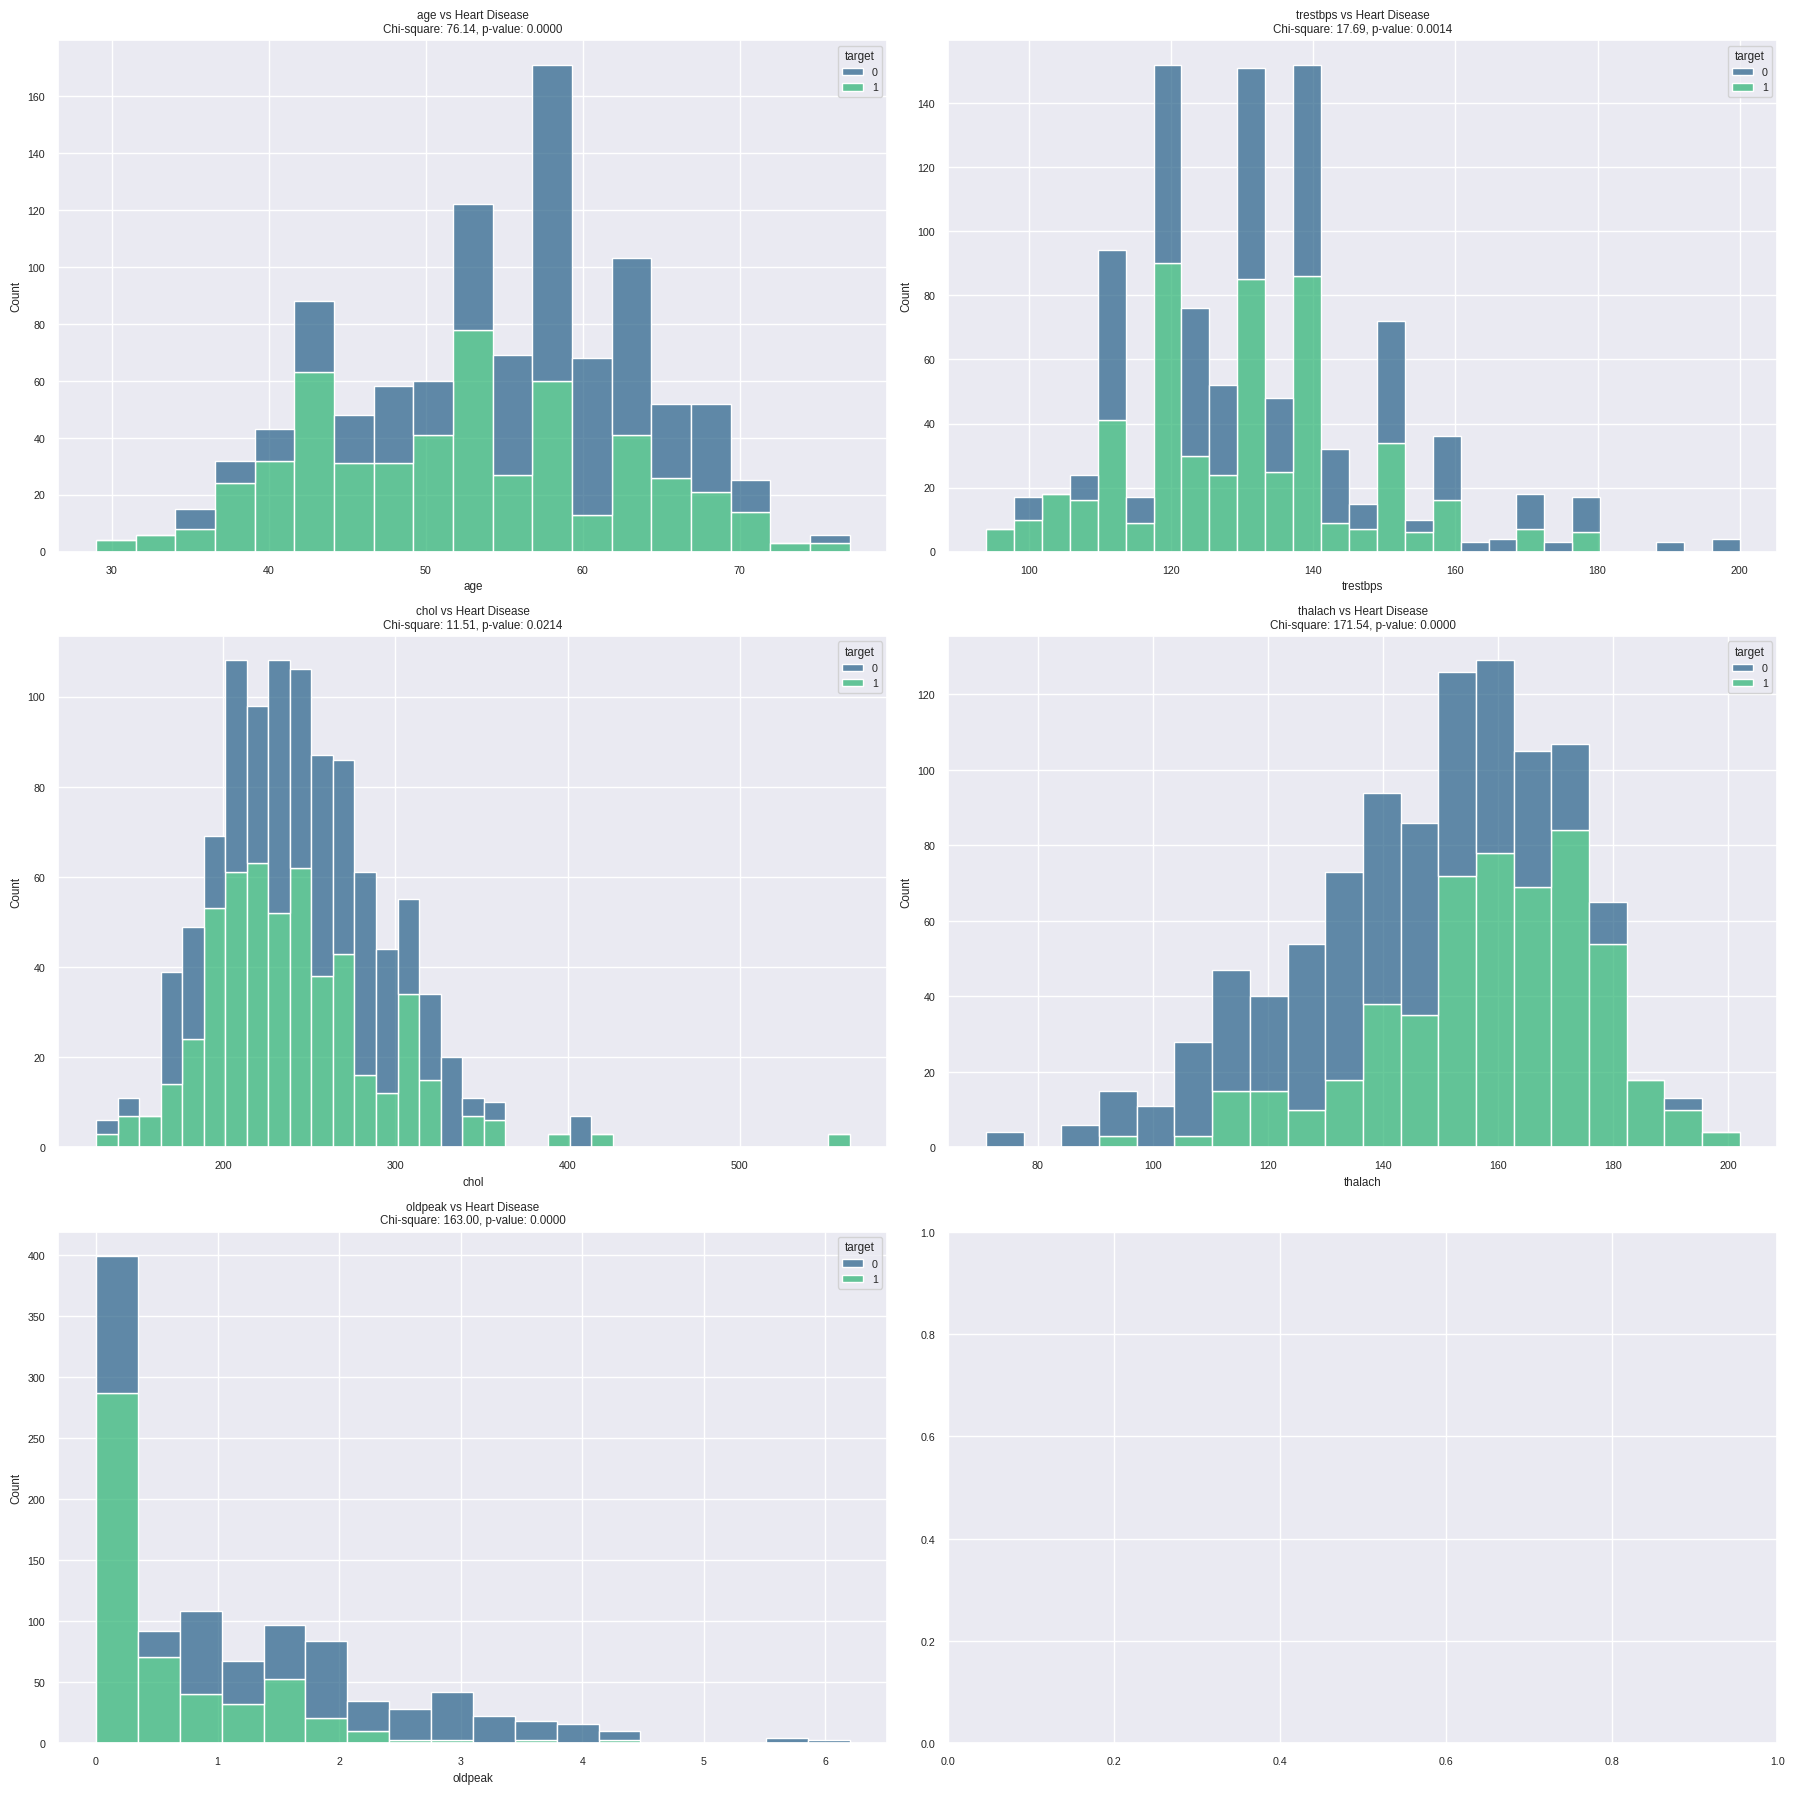

In [ ]:
# Create a 2-column grid of subplots to perform bivariate analysis between numeric features
num_rows = (len(numeric) + 1) // 2
sb.set(font_scale=0.7)
# Create the grid of subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(18, 18))
axes = axes.flatten()

# Perform bivariate analysis for each numeric column
for i, col in enumerate(numeric):
    # Create a contingency table
    contingency_table = pd.crosstab(pd.cut(df[col], bins=5), df['target'])

    # Perform chi-square test
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)

    # Create a stacked bar plot
    sb.histplot(x=col, hue='target', data=df, ax=axes[i], multiple='stack', palette='viridis')
    axes[i].set_title(f"{col} vs Heart Disease\nChi-square: {chi2:.2f}, p-value: {p_value:.4f}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")
    #axes[i].legend(title="Heart Disease", labels=["No", "Yes"])

plt.style.use('seaborn')
plt.tight_layout()
plt.show()

Categoriccal Features against Target

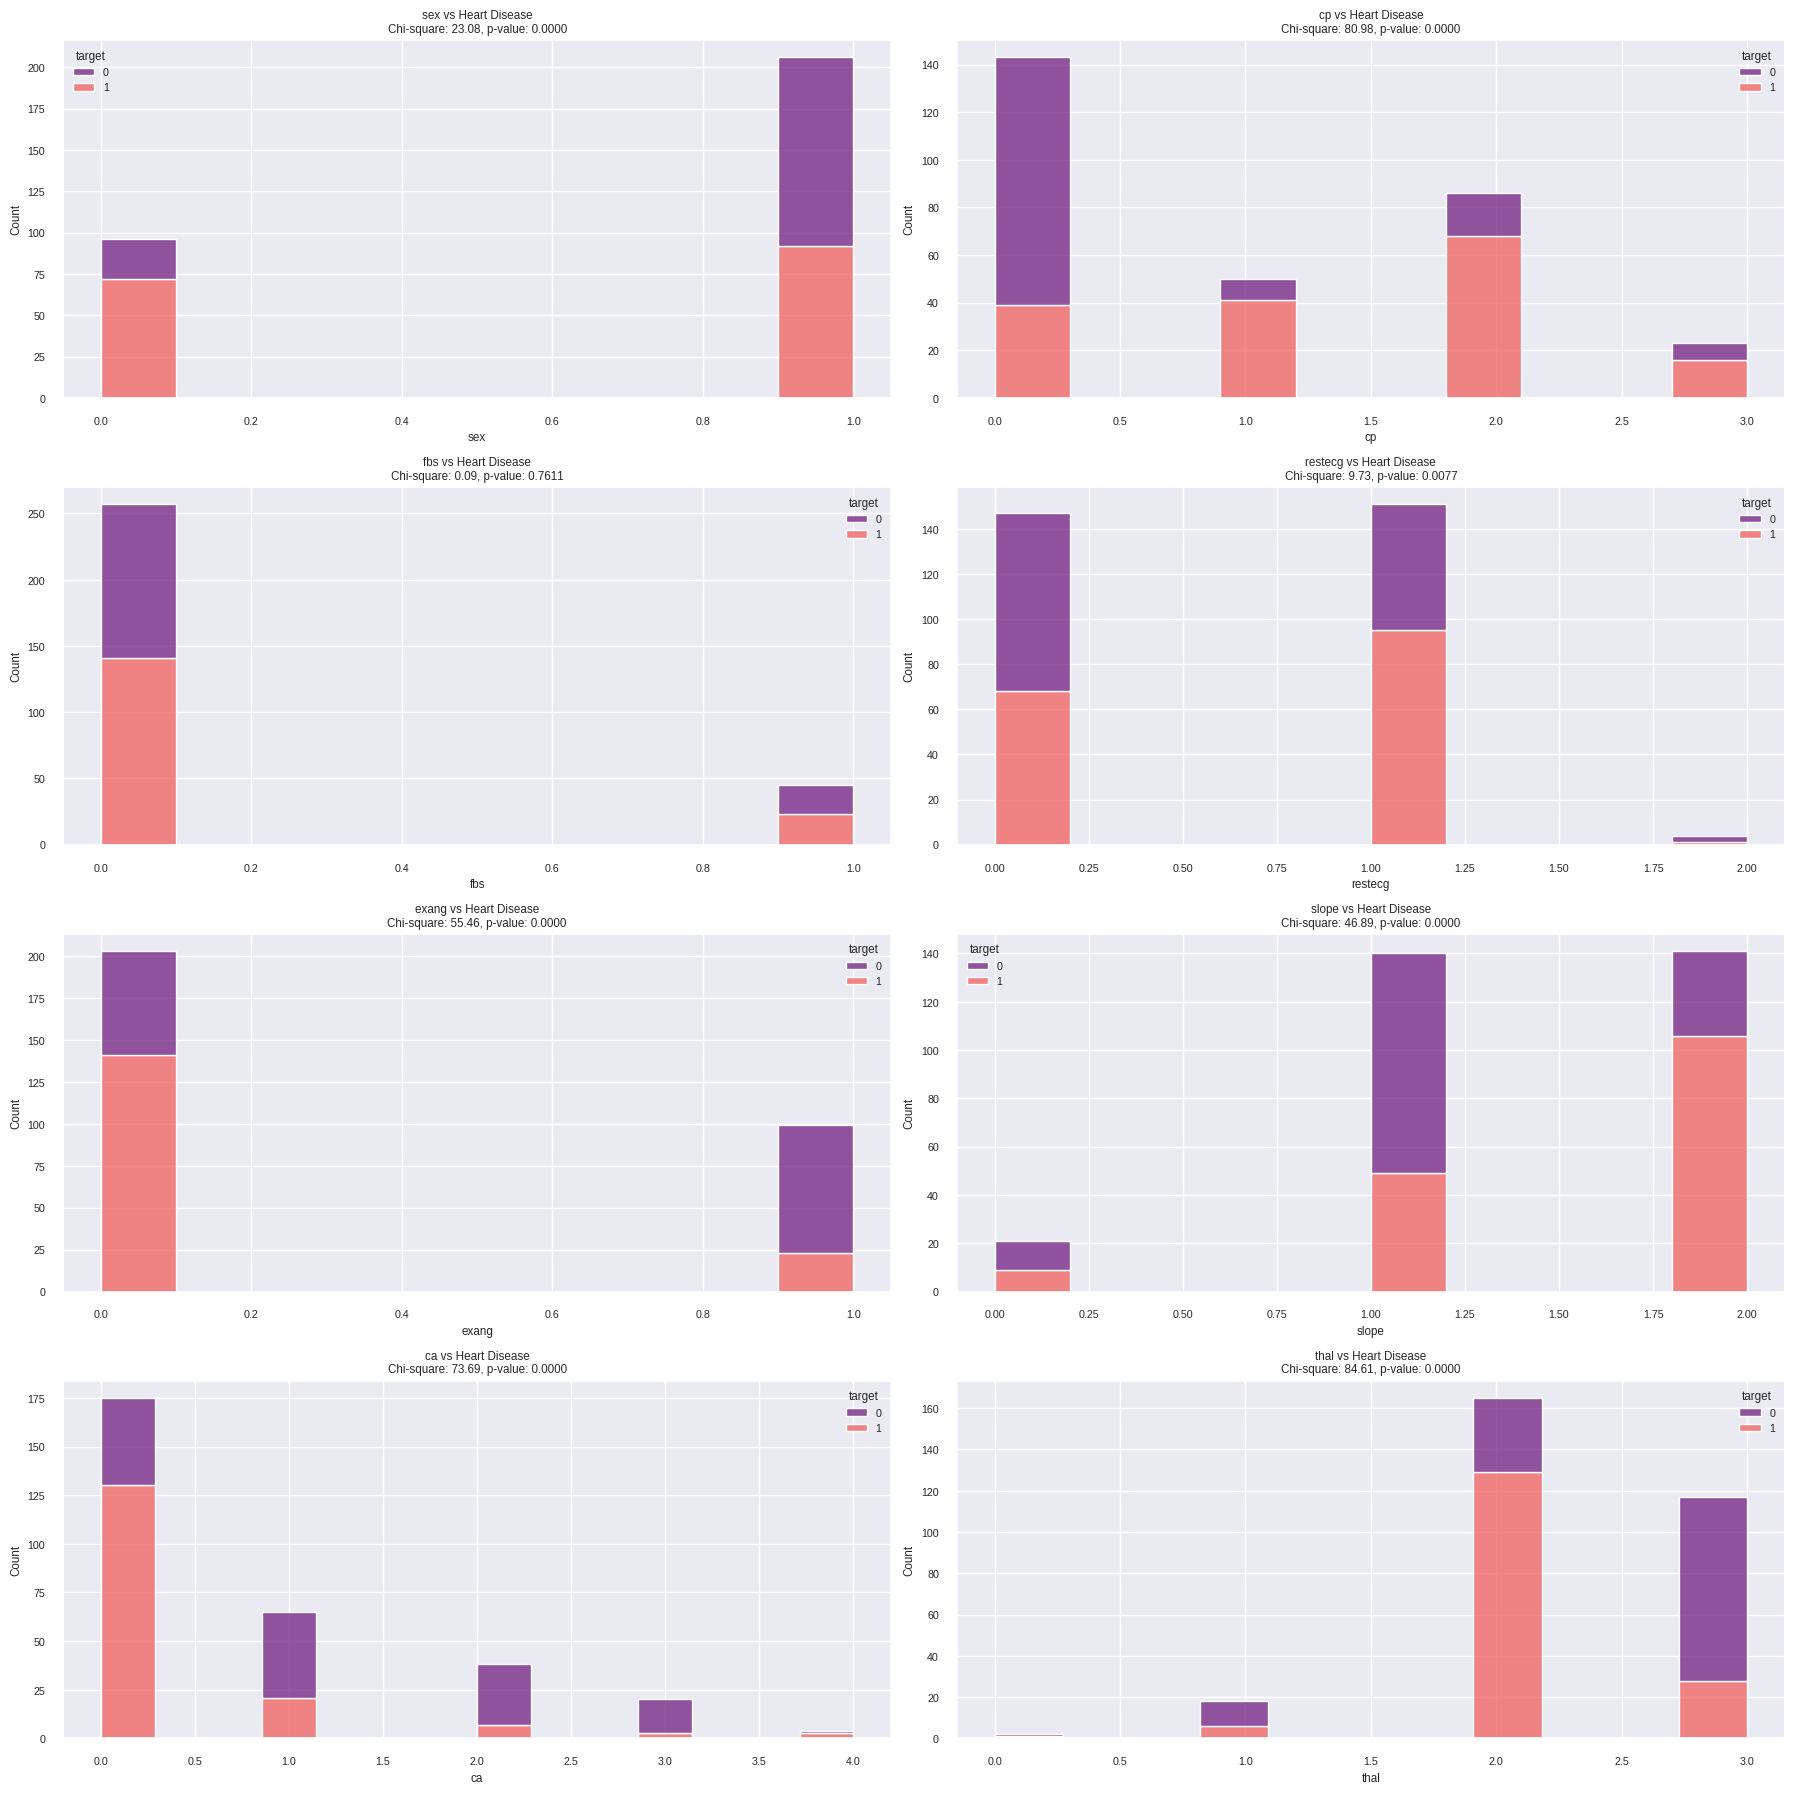

In [ ]:
# Create a 2-column grid of subplots to perform bivariate analysis between categorical features
sb.set(font_scale=0.7)
fig, axes = plt.subplots(len(categorical) // 2, 2, figsize=(18, 18))
axes = axes.flatten()

# Perform bivariate analysis for each categorical column
for i, col in enumerate(categorical):

    contingency_table = pd.crosstab(df[col], df['target']) # Create a contingency table
    chi2, p_value, dof, expected = chi2_contingency(contingency_table) # Perform chi-square test

    # Create a stacked bar plot
    sb.histplot(x=col, hue='target', data=df, ax=axes[i], multiple='stack', palette='magma')
    axes[i].set_title(f"{col} vs Heart Disease\nChi-square: {chi2:.2f}, p-value: {p_value:.4f}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")

plt.style.use('seaborn')
plt.tight_layout()
plt.show()

# Multivariate Analysis

In [ ]:
# Create the Plotly scatter plot
fig = go.Figure(data=[
    go.Scatter(
        x=df[df['target'] == 0]['exang'],
        y=df[df['target'] == 0]['thalach'],
        mode='markers',
        name='No Heart Disease',
        marker=dict(
            color='blue',
            opacity=0.8
        )
    ),
    go.Scatter(
        x=df[df['target'] == 1]['exang'],
        y=df[df['target'] == 1]['thalach'],
        mode='markers',
        name='Heart Disease',
        marker=dict(
            color='red',
            opacity=0.8
        )
    )
])

# Customize the layout
fig.update_layout(
    title='Exercise Induced Angina vs Maximum Heart Rate',
    xaxis_title='Exercise Induced Angina',
    yaxis_title='Max Heart Rate',
    legend=dict(
        title='Heart Disease Status',
        x=0.8,
        y=0.9,
        bgcolor='white',
        bordercolor='gray',
        borderwidth=1
    ),
    width=800,
    height=600
)

fig.show()

In [ ]:
# Create the Plotly scatter plot
fig = go.Figure(data=[
    go.Scatter(
        x=df[df['target'] == 0]['thalach'],
        y=df[df['target'] == 0]['oldpeak'],
        mode='markers',
        name='No Heart Disease',
        marker=dict(
            color='blue',
            opacity=0.8
        )
    ),
    go.Scatter(
        x=df[df['target'] == 1]['thalach'],
        y=df[df['target'] == 1]['oldpeak'],
        mode='markers',
        name='Heart Disease',
        marker=dict(
            color='red',
            opacity=0.8
        )
    )
])

# Customize the layout
fig.update_layout(
    title='Maximum Heart Rate vs Old Peak',
    xaxis_title='Max Heart Rate',
    yaxis_title='Old Peak',
    legend=dict(
        title='Heart Disease Status',
        x=0.8,
        y=0.9,
        bgcolor='white',
        bordercolor='gray',
        borderwidth=1
    ),
    width=800,
    height=600
)

fig.show()

In [ ]:
# Create the Plotly scatter plot
fig = go.Figure(data=[
    go.Scatter(
        x=df[df['target'] == 0]['slope'],
        y=df[df['target'] == 0]['oldpeak'],
        mode='markers',
        name='No Heart Disease',
        marker=dict(
            color='blue',
            opacity=0.8
        )
    ),
    go.Scatter(
        x=df[df['target'] == 1]['slope'],
        y=df[df['target'] == 1]['oldpeak'],
        mode='markers',
        name='Heart Disease',
        marker=dict(
            color='red',
            opacity=0.8
        )
    )
])

# Customize the layout
fig.update_layout(
    title='Oldpeak vs Slope',
    xaxis_title='Slope',
    yaxis_title='Oldpeak',
    legend=dict(
        title='Heart Disease Status',
        x=0.8,
        y=0.9,
        bgcolor='white',
        bordercolor='gray',
        borderwidth=1
    ),
    width=800,
    height=600
)

fig.show()

In [ ]:
# Create the Plotly scatter plot
fig = go.Figure(data=[
    go.Scatter(
        x=df[df['target'] == 0]['age'],
        y=df[df['target'] == 0]['ca'],
        mode='markers',
        name='No Heart Disease',
        marker=dict(
            color='blue',
            opacity=0.8
        )
    ),
    go.Scatter(
        x=df[df['target'] == 1]['age'],
        y=df[df['target'] == 1]['ca'],
        mode='markers',
        name='Heart Disease',
        marker=dict(
            color='red',
            opacity=0.8
        )
    )
])

# Customize the layout
fig.update_layout(
    title='Number of major vessels vs Age',
    xaxis_title='Age',
    yaxis_title='Number of major vessels',
    legend=dict(
        title='Heart Disease Status',
        x=0.8,
        y=0.9,
        bgcolor='white',
        bordercolor='gray',
        borderwidth=1
    ),
    width=800,
    height=600
)

fig.show()

In [ ]:
# Create the Plotly scatter plot
fig = go.Figure(data=[
    go.Scatter(
        x=df[df['target'] == 0]['age'],
        y=df[df['target'] == 0]['thalach'],
        mode='markers',
        name='No Heart Disease',
        marker=dict(
            color='blue',
            opacity=0.8
        )
    ),
    go.Scatter(
        x=df[df['target'] == 1]['age'],
        y=df[df['target'] == 1]['thalach'],
        mode='markers',
        name='Heart Disease',
        marker=dict(
            color='red',
            opacity=0.8
        )
    )
])

# Customize the layout
fig.update_layout(
    title='Maximum Heart Rate vs Age',
    xaxis_title='Age',
    yaxis_title='Number of major vessels',
    legend=dict(
        title='Heart Disease Status',
        x=0.8,
        y=0.9,
        bgcolor='white',
        bordercolor='gray',
        borderwidth=1
    ),
    width=800,
    height=600
)

fig.show()

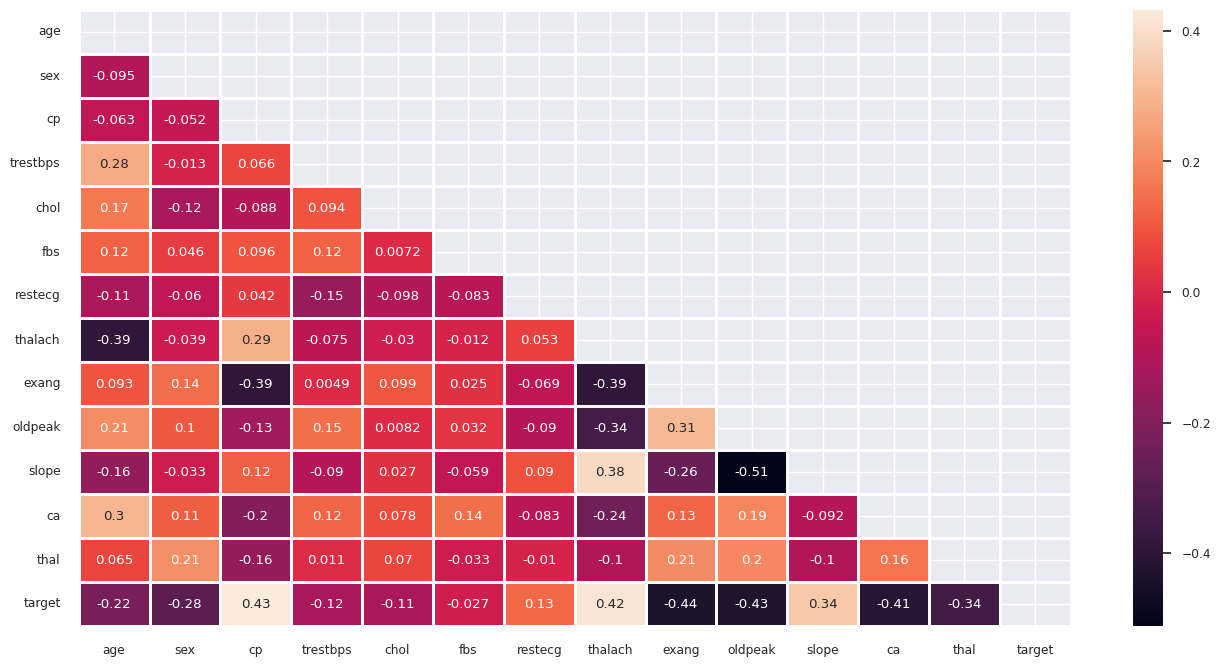

In [ ]:
plt.figure(figsize = (16, 8))
sb.set(font_scale = 0.8)
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))
sb.heatmap(corr, mask = mask, annot = True, fmt = '.2g', linewidths = 1)
plt.show()

# Feature Engineering

## Distribution of Numeric Features

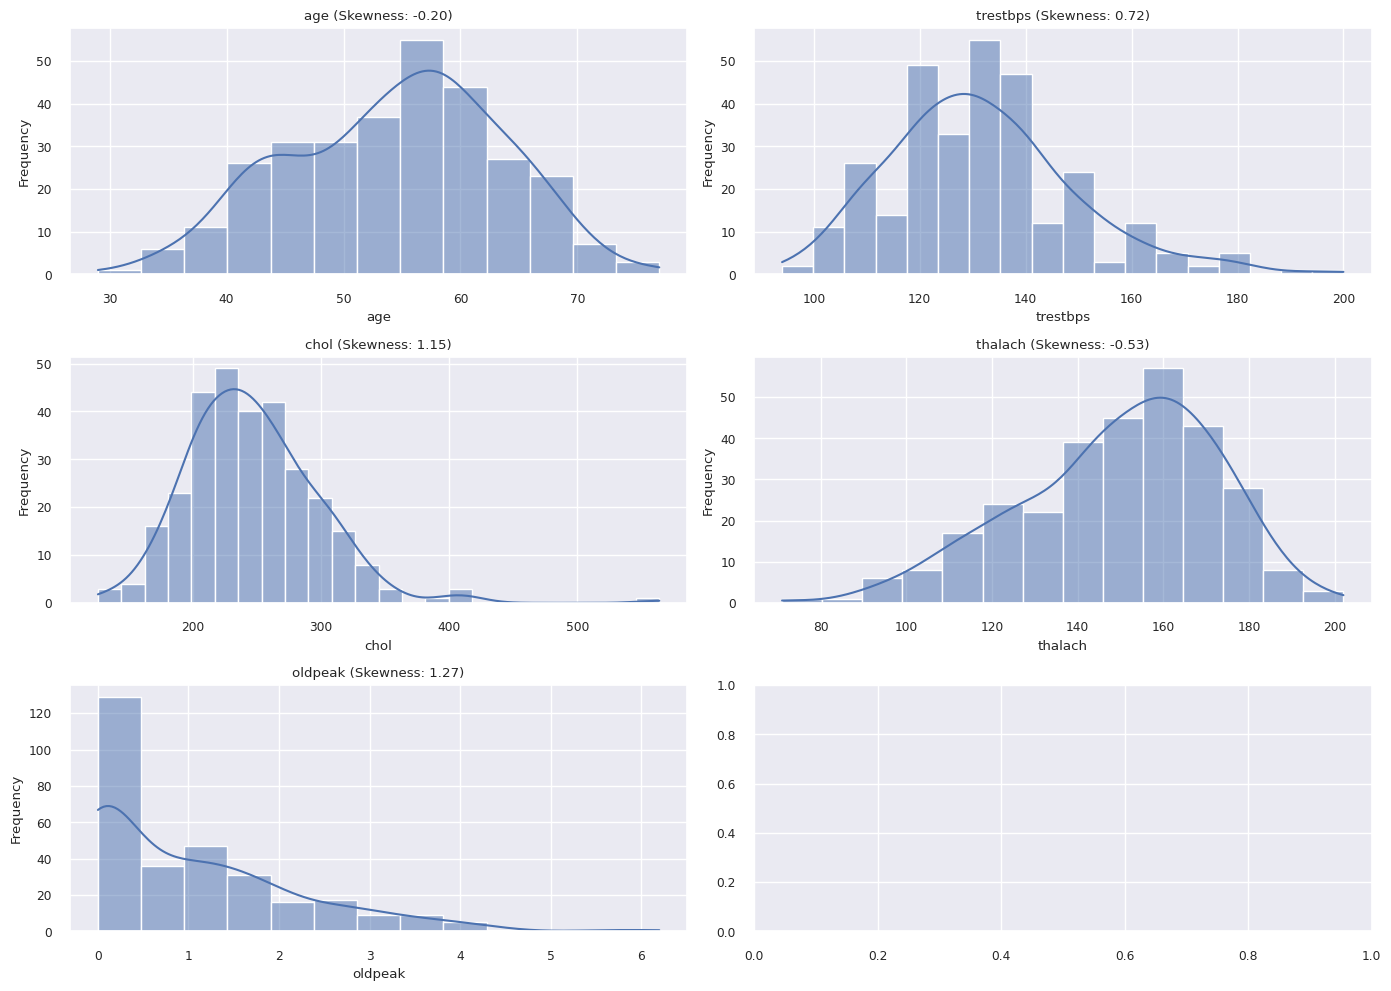

In [ ]:
# Calculate the skewness for the numeric columns
skewness = df[numeric].skew()
sb.set(font_scale=0.8)
# Create the figure and axes
fig, axes = plt.subplots(3, 2, figsize=(14, 10))
axes = axes.flatten()

# Plot the skewness for each feature
for i, (col, skew) in enumerate(skewness.items()):
    sb.histplot(df[col], ax=axes[i], kde=True)
    axes[i].set_title(f"{col} (Skewness: {skew:.2f})")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

We have to reduce the skewness to make the distribution more Gaussian

# Data Split

In [ ]:
X = df.drop(['target'], axis=1)
y = df['target']

In [ ]:
pipeline = ColumnTransformer([
    ('num', RobustScaler(), numeric),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical),
])

X_transformed = pipeline.fit_transform(X) # Fit and transform the data

new_feature_names = pipeline.get_feature_names_out() # Get the transformed feature names

X2 = pd.DataFrame(data=X_transformed, columns=new_feature_names) # Create a DataFrame from the transformed data

In [ ]:
X2

,num__age,num__trestbps,num__chol,num__thalach,num__oldpeak,cat__sex_0,cat__sex_1,cat__cp_0,cat__cp_1,cat__cp_2,...,cat__slope_2,cat__ca_0,cat__ca_1,cat__ca_2,cat__ca_3,cat__ca_4,cat__thal_0,cat__thal_1,cat__thal_2,cat__thal_3
0,-0.269231,-0.25,-0.447059,0.473282,0.1250,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.192308,0.50,-0.588235,0.076336,1.4375,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.115385,0.75,-1.043137,-0.839695,1.1250,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.423077,0.90,-0.588235,0.259542,-0.5000,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.500000,0.40,0.839216,-1.419847,0.6875,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,0.961538,-0.50,-0.462745,-1.145038,0.4375,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
298,-0.884615,-1.10,-1.560784,0.687023,-0.1250,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
299,-0.269231,-0.10,0.227451,0.259542,-0.5000,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
300,0.269231,1.50,0.509804,-0.839695,-0.5000,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=50, stratify=y)

# Modeling

## Convenience Functions

In [ ]:
def evaluate_classifier(clf, X_train, y_train, X_test, y_test):

    """
    A function to train, test models, produce results in a dataframe, and plot confusion matrix and ROC AUC
    """
    clf.fit(X_train, y_train)  # Fit the classifier on training data
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)

    metrics = {
        'Model': [type(clf).__name__],
        'Accuracy (Train)': [accuracy_score(y_train, y_pred_train)],
        'Accuracy (Test)': [accuracy_score(y_test, y_pred_test)],
        'Precision': [precision_score(y_test, y_pred_test)],
        'Recall': [recall_score(y_test, y_pred_test)],
        'ROC AUC': [roc_auc_score(y_test, y_pred_test)],
        'F1-Wgt': [f1_score(y_test, y_pred_test, average='weighted')],
        'Confusion Matrix': [confusion_matrix(y_test, y_pred_test)]
    }

    df = pd.DataFrame(metrics)
    print()
    # Plot confusion matrix
    cm = df['Confusion Matrix'].values[0]
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    sb.heatmap(cm, annot=True, fmt='d')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

    # Plot ROC curve
    if hasattr(clf, "predict_proba"):
        y_pred_proba = clf.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_auc = roc_auc_score(y_test, y_pred_proba)
        plt.subplot(1, 2, 2)
        plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic')
        plt.legend(loc="lower right")

    plt.tight_layout()
    plt.show()

    return df

In [ ]:
def rank_models(results_list):
  """
  function to rank models
  """
  ranked_results = pd.concat(results_list)
  ranked_results = ranked_results.sort_values(by='Accuracy (Test)', ascending=False)
  return ranked_results.reset_index(drop=True)

## Logistic Regression

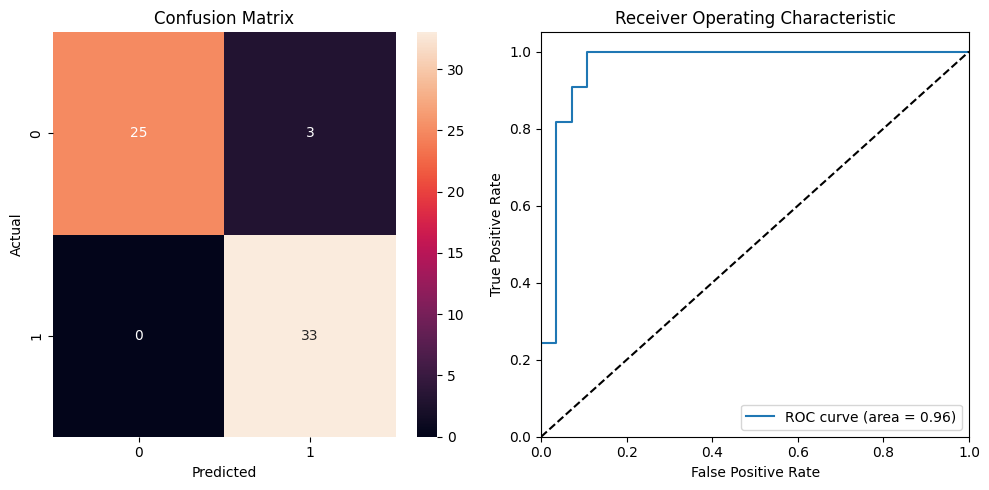

,Model,Accuracy (Train),Accuracy (Test),Precision,Recall,ROC AUC,F1-Wgt,Confusion Matrix
0,LogisticRegression,0.854772,0.95082,0.916667,1.0,0.946429,0.950497,"[[25, 3], [0, 33]]"


In [ ]:
lr =LogisticRegression()
lr_res = evaluate_classifier(lr, X_train, y_train, X_test, y_test)
lr_res

## SVC

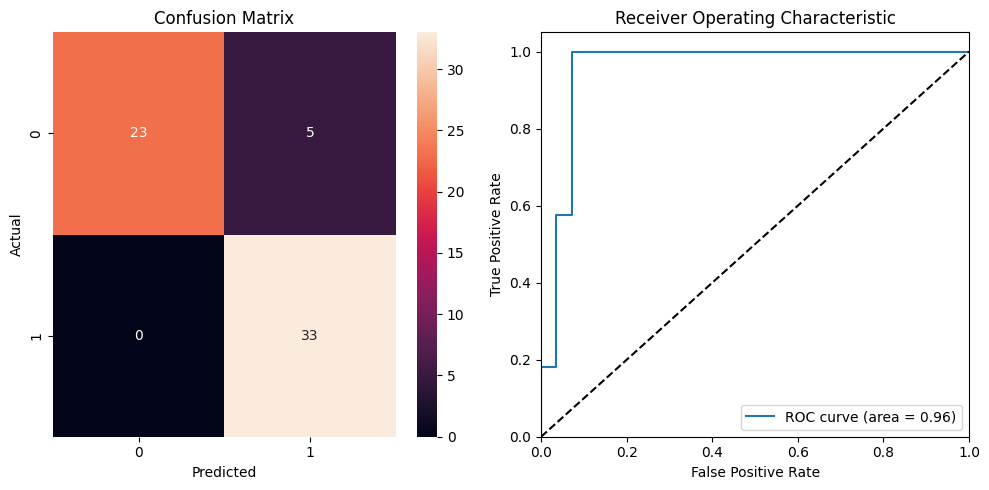

,Model,Accuracy (Train),Accuracy (Test),Precision,Recall,ROC AUC,F1-Wgt,Confusion Matrix
0,SVC,0.908714,0.918033,0.868421,1.0,0.910714,0.916901,"[[23, 5], [0, 33]]"


In [ ]:
svm = SVC(probability=True)
svm_res = evaluate_classifier(svm, X_train, y_train, X_test, y_test)
svm_res

## Naive Bayes

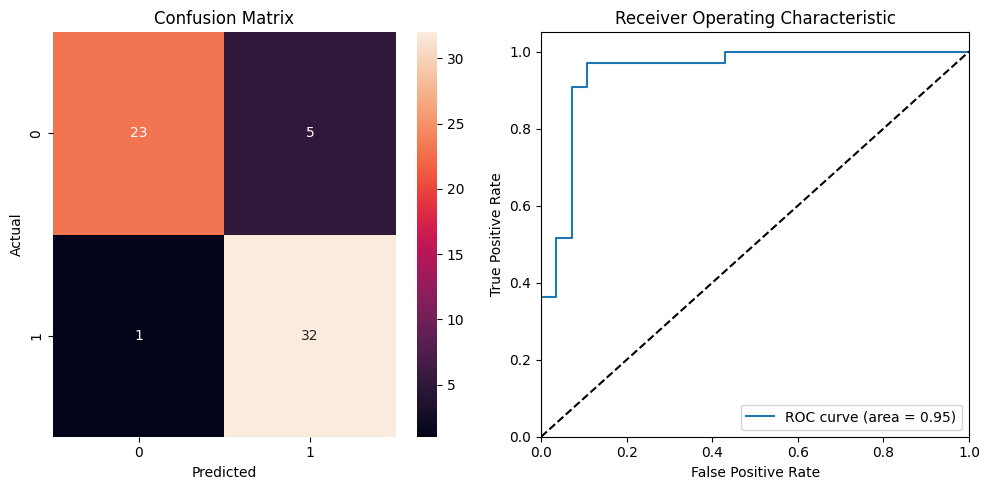

,Model,Accuracy (Train),Accuracy (Test),Precision,Recall,ROC AUC,F1-Wgt,Confusion Matrix
0,GaussianNB,0.821577,0.901639,0.864865,0.969697,0.895563,0.900667,"[[23, 5], [1, 32]]"


In [ ]:
nb = GaussianNB()
nb_res = evaluate_classifier(nb, X_train, y_train, X_test, y_test)
nb_res

## Random Forest

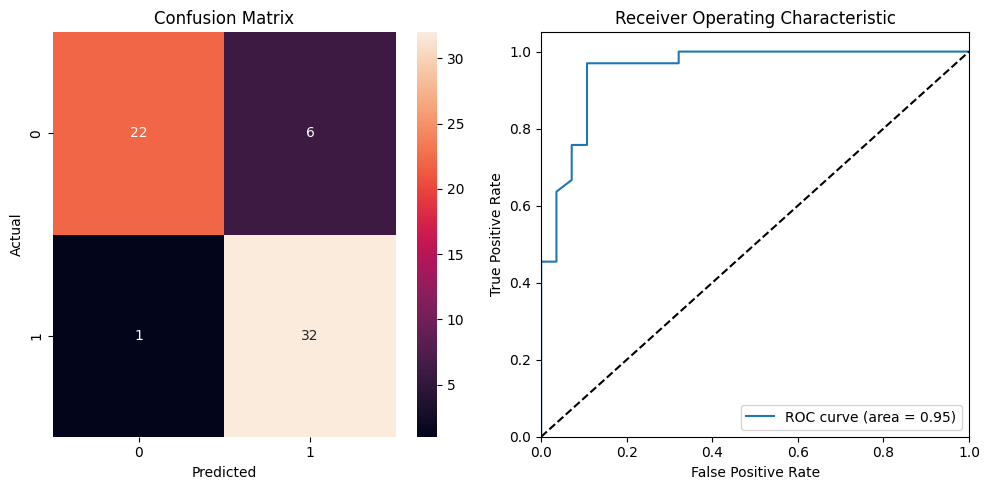

,Model,Accuracy (Train),Accuracy (Test),Precision,Recall,ROC AUC,F1-Wgt,Confusion Matrix
0,RandomForestClassifier,1.0,0.885246,0.842105,0.969697,0.877706,0.883661,"[[22, 6], [1, 32]]"


In [ ]:
rf = RandomForestClassifier()
rf_res = evaluate_classifier(rf, X_train, y_train, X_test, y_test)
rf_res

## K Nearest Neighbor



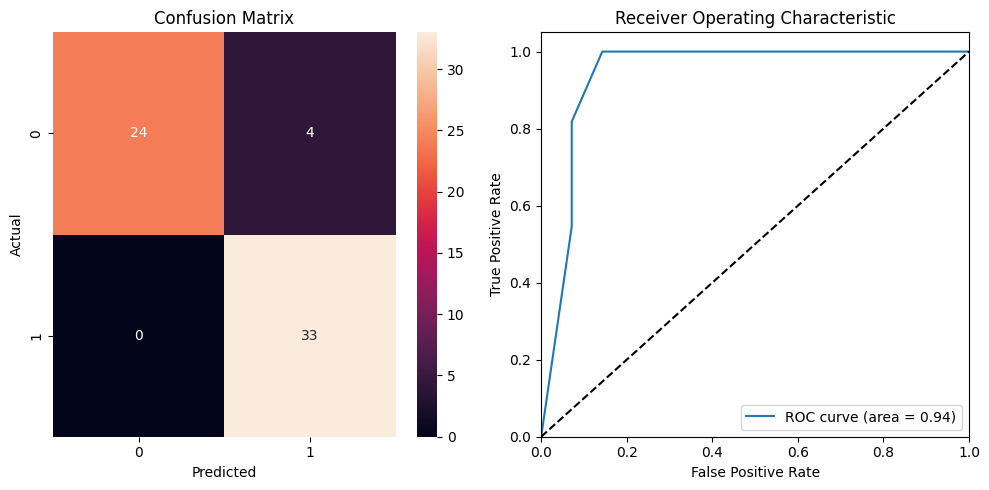

,Model,Accuracy (Train),Accuracy (Test),Precision,Recall,ROC AUC,F1-Wgt,Confusion Matrix
0,KNeighborsClassifier,0.883817,0.934426,0.891892,1.0,0.928571,0.933778,"[[24, 4], [0, 33]]"


In [ ]:
knn = KNeighborsClassifier()
knn_res = evaluate_classifier(knn, X_train, y_train, X_test, y_test)
knn_res

Result Comparison

In [ ]:
results = [lr_res, nb_res, svm_res, knn_res, rf_res]
rank_models(results)

,Model,Accuracy (Train),Accuracy (Test),Precision,Recall,ROC AUC,F1-Wgt,Confusion Matrix
0,LogisticRegression,0.854772,0.950820,0.916667,1.000000,0.946429,0.950497,"[[25, 3], [0, 33]]"
1,KNeighborsClassifier,0.883817,0.934426,0.891892,1.000000,0.928571,0.933778,"[[24, 4], [0, 33]]"
2,SVC,0.908714,0.918033,0.868421,1.000000,0.910714,0.916901,"[[23, 5], [0, 33]]"
3,GaussianNB,0.821577,0.901639,0.864865,0.969697,0.895563,0.900667,"[[23, 5], [1, 32]]"
4,RandomForestClassifier,1.000000,0.885246,0.842105,0.969697,0.877706,0.883661,"[[22, 6], [1, 32]]"


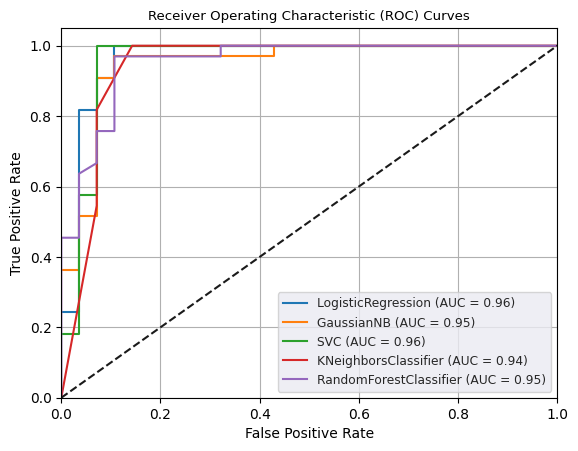

In [ ]:
models = [lr, nb, svm, knn, rf]

for model in models:
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{type(model).__name__} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
sb.set(font_scale=0.8)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.grid()
plt.show()

## Feature Importance

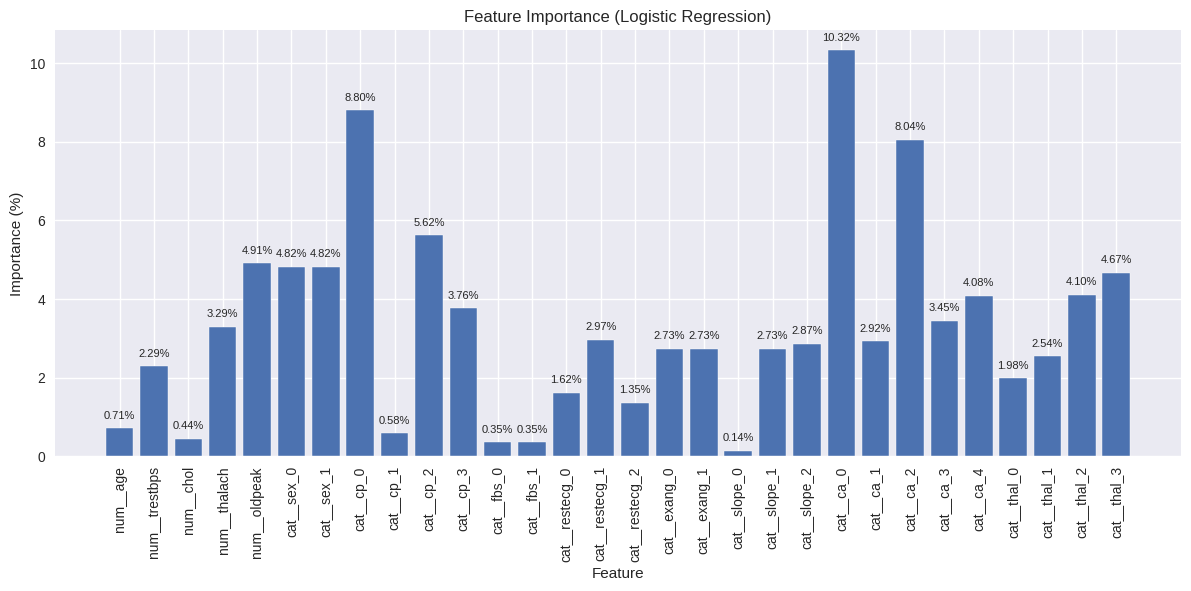

In [ ]:
feature_coefficients = lr.coef_[0]

# Create a bar plot of feature importance
feature_names = X2.columns
# Calculate percentages for feature importance
total_importance = np.abs(feature_coefficients).sum()
percentages = (np.abs(feature_coefficients) / total_importance) * 100

# Create a bar plot of feature importance with percentages

plt.style.use('seaborn')
plt.figure(figsize=(12, 6))
plt.bar(feature_names, percentages)
plt.xticks(rotation=90)
plt.title("Feature Importance (Logistic Regression)")
plt.xlabel("Feature")
plt.ylabel("Importance (%)")

# Add percentages as text labels above each bar
for i, v in enumerate(percentages):
    plt.text(i, v + 0.2, f"{v:.2f}%", ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()